In [1]:
import matplotlib.pyplot as plt
from math import sin, pi

In [119]:
class rotary_table_2d:
    def __init__(self, DT, CurPos=(0, 0), max_rate=(720, 1200), max_accel=(100, 100)):
        self.T = 0
        self.DT = DT
        self.cur_pos = [CurPos[0], CurPos[1]]
        self.rate = [0, 0]
        self.accel = 0
        self.max_rate = max_rate
        self.max_accel = max_accel
        self.pos_history = [[CurPos[0]], [CurPos[1]]]
        self.rate_history = [[0], [0]]
        self.accel_history = [[0], [0]]
        self.time_history = [0]
        self.direct_key = 0

    def POS(self, AxisNumber, Position, Rate=100):

        if (AxisNumber == 1 and (Rate < 0 or Rate > self.max_rate[0])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 2 and (Rate < 0 or Rate > self.max_rate[1])):
            raise ValueError("Недопустимое значение скорости")
        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        self.rate[AxisNumber - 1] = Rate

        while (abs(Position - self.cur_pos[AxisNumber - 1]) > 1e-2):
            self.cur_pos[AxisNumber - 1] += Rate * self.DT
            self.check_pos()
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            self.accel_history[0] += [0]
            self.accel_history[1] += [0]
            self.T += self.DT
            self.time_history += [self.T]

        print(self.cur_pos)
        self.rate = [0, 0]

    def PRS(self, AxisNumber, Position, Rate=10):

        if (AxisNumber == 1 and (Rate < 0 or Rate > self.max_rate[0])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 2 and (Rate < 0 or Rate > self.max_rate[1])):
            raise ValueError("Недопустимое значение скорости")
        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        self.rate[AxisNumber - 1] = Rate
        self.direct_key = 0

        while (abs(Position - self.cur_pos[AxisNumber - 1]) > 1e-1):
            print(abs(360 - Position), abs(Position -
                                           self.cur_pos[AxisNumber - 1]), self.direct_key)
            if abs(0 - Position) > abs(Position - self.cur_pos[AxisNumber - 1]) and (self.direct_key == 0):
                self.direct_key = 1
            else:
                self.direct_key = -1
            self.cur_pos[AxisNumber -
                         1] += self.direct_key * self.rate[AxisNumber - 1] * self.DT
            self.check_pos()
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            self.accel_history[0] += [0]
            self.accel_history[1] += [0]
            self.T += self.DT
            self.time_history += [self.T]

        self.rate = [0, 0]

    def PRV(self, AxisNumber, Position, Rate=10, Acceleration=10):

        self.rate[AxisNumber - 1] = 0

        if (AxisNumber == 1 and (Rate < 0 or Rate > self.max_rate[0])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 2 and (Rate < 0 or Rate > self.max_rate[1])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 1 and (Acceleration < 0 or Acceleration > self.max_accel[0])):
            raise ValueError("Недопустимое значение ускорения")
        if (AxisNumber == 2 and (Acceleration < 0 or Acceleration > self.max_accel[1])):
            raise ValueError("Недопустимое значение ускорения")
        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        self.direct_key = 0

        while (abs(Position - self.cur_pos[AxisNumber - 1]) % 360 > 1e-2):
            if self.rate[AxisNumber - 1] < Rate:
                self.rate[AxisNumber - 1] += Acceleration * self.DT

            if (abs(0 - Position) > abs(Position - self.cur_pos[AxisNumber - 1]) or \
                abs(360 - Position) > abs(Position - self.cur_pos[AxisNumber - 1])) and self.direct_key == 0:
                self.direct_key = 1
            else:
                self.direct_key = -1
            self.cur_pos[AxisNumber -
                         1] += self.direct_key * self.rate[AxisNumber - 1] * self.DT
            self.check_pos()
            #print(self.rate[AxisNumber - 1], self.cur_pos[AxisNumber - 1], 360 - abs(self.cur_pos[0]))
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            if AxisNumber == 1:
                self.accel_history[0] += [Acceleration]
                self.accel_history[1] += [0]
            else:
                self.accel_history[0] += [0]
                self.accel_history[1] += [Acceleration]
            self.T += self.DT
            self.time_history += [self.T]

        self.rate = [0, 0]

    def RAT(self, AxisNumber, TMODEL=60, Rate=10, Acceleration=10):

        self.rate[AxisNumber - 1] = 0

        if (AxisNumber == 1 and (Rate < 0 or Rate > self.max_rate[0])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 2 and (Rate < 0 or Rate > self.max_rate[1])):
            raise ValueError("Недопустимое значение скорости")
        if (AxisNumber == 1 and (Acceleration < 0 or Acceleration > self.max_accel[0])):
            raise ValueError("Недопустимое значение ускорения")
        if (AxisNumber == 2 and (Acceleration < 0 or Acceleration > self.max_accel[1])):
            raise ValueError("Недопустимое значение ускорения")
        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        T_start = self.T
        while (self.T - T_start < TMODEL):
            if self.rate[AxisNumber - 1] < Rate:
                self.rate[AxisNumber - 1] += Acceleration * self.DT
            self.cur_pos[AxisNumber - 1] += self.rate[AxisNumber - 1] * self.DT
            self.check_pos()
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            if AxisNumber == 1:
                self.accel_history[0] += [Acceleration]
                self.accel_history[1] += [0]
            else:
                self.accel_history[0] += [0]
                self.accel_history[1] += [Acceleration]
            self.T += self.DT
            self.time_history += [self.T]

        self.rate = [0, 0]

    def SIN(self, AxisNumber, TMODEL, Amp, Freq, Phase):

        if AxisNumber not in (1, 2):
            raise ValueError("Неправильный номер оси вращения")

        T_start = self.T

        while (self.T - T_start < TMODEL):
            self.rate[AxisNumber - 1] = 2*pi*Freq*Amp * \
                sin(2*pi*Freq*(self.T - T_start) + Phase/57.3)
            self.cur_pos[AxisNumber - 1] += self.rate[AxisNumber - 1] * self.DT
            self.check_pos()
            self.pos_history[0] += [self.cur_pos[0]]
            self.pos_history[1] += [self.cur_pos[1]]
            self.rate_history[0] += [self.rate[0]]
            self.rate_history[1] += [self.rate[1]]
            if AxisNumber == 1:
                self.accel_history[0] += [2*pi*Freq*2*pi*Freq*Amp *
                                          sin(2*pi*Freq*(self.T - T_start) + Phase/57.3 + pi/2)]
                self.accel_history[1] += [0]
            else:
                self.accel_history[1] += [2*pi*Freq*2*pi*Freq*Amp *
                                          sin(2*pi*Freq*(self.T - T_start) + Phase/57.3 + pi/2)]
                self.accel_history[0] += [0]
            self.T += self.DT
            self.time_history += [self.T]

        self.rate = [0, 0]

    def check_pos(self):
        self.cur_pos[0] = self.cur_pos[0] % 360 if self.cur_pos[0] > 0 else (
            360 - abs(self.cur_pos[0])) % 360
        self.cur_pos[1] = self.cur_pos[1] % 360 if self.cur_pos[1] > 0 else (
            360 - abs(self.cur_pos[1])) % 360

In [117]:
my_table = rotary_table_2d(0.0001)

my_table.POS(1, 150, 100)
# my_table.POS(1, 10, 500)
# my_table.PRS(1, 150, 200)
my_table.PRS(1, 15, 300)
# my_table.PRV(1, 200, 10, 1)
# my_table.RAT(1, 15, 10, 15)
# my_table.SIN(1, 15, 3, 0.5, 180)

[149.99000000000856, 0]
345 134.99000000000856 0
345 134.96000000000856 -1
345 134.93000000000856 -1
345 134.90000000000856 -1
345 134.87000000000856 -1
345 134.84000000000856 -1
345 134.81000000000856 -1
345 134.78000000000856 -1
345 134.75000000000855 -1
345 134.72000000000855 -1
345 134.69000000000855 -1
345 134.66000000000855 -1
345 134.63000000000855 -1
345 134.60000000000855 -1
345 134.57000000000855 -1
345 134.54000000000855 -1
345 134.51000000000855 -1
345 134.48000000000854 -1
345 134.45000000000854 -1
345 134.42000000000854 -1
345 134.39000000000854 -1
345 134.36000000000854 -1
345 134.33000000000854 -1
345 134.30000000000854 -1
345 134.27000000000854 -1
345 134.24000000000854 -1
345 134.21000000000853 -1
345 134.18000000000853 -1
345 134.15000000000853 -1
345 134.12000000000853 -1
345 134.09000000000853 -1
345 134.06000000000853 -1
345 134.03000000000853 -1
345 134.00000000000853 -1
345 133.97000000000853 -1
345 133.94000000000852 -1
345 133.91000000000852 -1
345 133.8800000

345 112.91000000000773 -1
345 112.88000000000773 -1
345 112.85000000000773 -1
345 112.82000000000772 -1
345 112.79000000000772 -1
345 112.76000000000772 -1
345 112.73000000000772 -1
345 112.70000000000772 -1
345 112.67000000000772 -1
345 112.64000000000772 -1
345 112.61000000000772 -1
345 112.58000000000771 -1
345 112.55000000000771 -1
345 112.52000000000771 -1
345 112.49000000000771 -1
345 112.46000000000771 -1
345 112.43000000000771 -1
345 112.40000000000771 -1
345 112.3700000000077 -1
345 112.3400000000077 -1
345 112.3100000000077 -1
345 112.2800000000077 -1
345 112.2500000000077 -1
345 112.2200000000077 -1
345 112.1900000000077 -1
345 112.1600000000077 -1
345 112.1300000000077 -1
345 112.1000000000077 -1
345 112.0700000000077 -1
345 112.0400000000077 -1
345 112.0100000000077 -1
345 111.98000000000769 -1
345 111.95000000000769 -1
345 111.92000000000769 -1
345 111.89000000000769 -1
345 111.86000000000769 -1
345 111.83000000000769 -1
345 111.80000000000769 -1
345 111.77000000000768 -1

345 93.29000000000698 -1
345 93.26000000000698 -1
345 93.23000000000698 -1
345 93.20000000000698 -1
345 93.17000000000698 -1
345 93.14000000000698 -1
345 93.11000000000698 -1
345 93.08000000000698 -1
345 93.05000000000697 -1
345 93.02000000000697 -1
345 92.99000000000697 -1
345 92.96000000000697 -1
345 92.93000000000697 -1
345 92.90000000000697 -1
345 92.87000000000697 -1
345 92.84000000000697 -1
345 92.81000000000697 -1
345 92.78000000000696 -1
345 92.75000000000696 -1
345 92.72000000000696 -1
345 92.69000000000696 -1
345 92.66000000000696 -1
345 92.63000000000696 -1
345 92.60000000000696 -1
345 92.57000000000696 -1
345 92.54000000000696 -1
345 92.51000000000695 -1
345 92.48000000000695 -1
345 92.45000000000695 -1
345 92.42000000000695 -1
345 92.39000000000695 -1
345 92.36000000000695 -1
345 92.33000000000695 -1
345 92.30000000000695 -1
345 92.27000000000695 -1
345 92.24000000000694 -1
345 92.21000000000694 -1
345 92.18000000000694 -1
345 92.15000000000694 -1
345 92.12000000000694 -1


345 74.87000000000629 -1
345 74.84000000000628 -1
345 74.81000000000628 -1
345 74.78000000000628 -1
345 74.75000000000628 -1
345 74.72000000000628 -1
345 74.69000000000628 -1
345 74.66000000000628 -1
345 74.63000000000628 -1
345 74.60000000000628 -1
345 74.57000000000627 -1
345 74.54000000000627 -1
345 74.51000000000627 -1
345 74.48000000000627 -1
345 74.45000000000627 -1
345 74.42000000000627 -1
345 74.39000000000627 -1
345 74.36000000000627 -1
345 74.33000000000627 -1
345 74.30000000000626 -1
345 74.27000000000626 -1
345 74.24000000000626 -1
345 74.21000000000626 -1
345 74.18000000000626 -1
345 74.15000000000626 -1
345 74.12000000000626 -1
345 74.09000000000626 -1
345 74.06000000000626 -1
345 74.03000000000625 -1
345 74.00000000000625 -1
345 73.97000000000625 -1
345 73.94000000000625 -1
345 73.91000000000625 -1
345 73.88000000000625 -1
345 73.85000000000625 -1
345 73.82000000000625 -1
345 73.79000000000624 -1
345 73.76000000000624 -1
345 73.73000000000624 -1
345 73.70000000000624 -1


345 54.500000000005514 -1
345 54.47000000000551 -1
345 54.44000000000551 -1
345 54.41000000000551 -1
345 54.38000000000551 -1
345 54.35000000000551 -1
345 54.32000000000551 -1
345 54.290000000005506 -1
345 54.260000000005505 -1
345 54.230000000005504 -1
345 54.2000000000055 -1
345 54.1700000000055 -1
345 54.1400000000055 -1
345 54.1100000000055 -1
345 54.0800000000055 -1
345 54.0500000000055 -1
345 54.020000000005496 -1
345 53.990000000005494 -1
345 53.96000000000549 -1
345 53.93000000000549 -1
345 53.90000000000549 -1
345 53.87000000000549 -1
345 53.84000000000549 -1
345 53.81000000000549 -1
345 53.78000000000549 -1
345 53.750000000005485 -1
345 53.720000000005484 -1
345 53.69000000000548 -1
345 53.66000000000548 -1
345 53.63000000000548 -1
345 53.60000000000548 -1
345 53.57000000000548 -1
345 53.54000000000548 -1
345 53.510000000005476 -1
345 53.480000000005475 -1
345 53.450000000005474 -1
345 53.42000000000547 -1
345 53.39000000000547 -1
345 53.36000000000547 -1
345 53.3300000000054

345 35.93000000000481 -1
345 35.90000000000481 -1
345 35.87000000000481 -1
345 35.84000000000481 -1
345 35.810000000004806 -1
345 35.780000000004804 -1
345 35.7500000000048 -1
345 35.7200000000048 -1
345 35.6900000000048 -1
345 35.6600000000048 -1
345 35.6300000000048 -1
345 35.6000000000048 -1
345 35.5700000000048 -1
345 35.540000000004795 -1
345 35.510000000004794 -1
345 35.48000000000479 -1
345 35.45000000000479 -1
345 35.42000000000479 -1
345 35.39000000000479 -1
345 35.36000000000479 -1
345 35.33000000000479 -1
345 35.300000000004786 -1
345 35.270000000004785 -1
345 35.240000000004784 -1
345 35.21000000000478 -1
345 35.18000000000478 -1
345 35.15000000000478 -1
345 35.12000000000478 -1
345 35.09000000000478 -1
345 35.06000000000478 -1
345 35.030000000004776 -1
345 35.000000000004775 -1
345 34.970000000004774 -1
345 34.94000000000477 -1
345 34.91000000000477 -1
345 34.88000000000477 -1
345 34.85000000000477 -1
345 34.82000000000477 -1
345 34.79000000000477 -1
345 34.760000000004766

345 14.30000000000399 -1
345 14.27000000000399 -1
345 14.240000000003988 -1
345 14.210000000003987 -1
345 14.180000000003986 -1
345 14.150000000003985 -1
345 14.120000000003984 -1
345 14.090000000003982 -1
345 14.060000000003981 -1
345 14.03000000000398 -1
345 14.000000000003979 -1
345 13.970000000003978 -1
345 13.940000000003977 -1
345 13.910000000003976 -1
345 13.880000000003974 -1
345 13.850000000003973 -1
345 13.820000000003972 -1
345 13.790000000003971 -1
345 13.76000000000397 -1
345 13.730000000003969 -1
345 13.700000000003968 -1
345 13.670000000003967 -1
345 13.640000000003965 -1
345 13.610000000003964 -1
345 13.580000000003963 -1
345 13.550000000003962 -1
345 13.52000000000396 -1
345 13.49000000000396 -1
345 13.460000000003959 -1
345 13.430000000003957 -1
345 13.400000000003956 -1
345 13.370000000003955 -1
345 13.340000000003954 -1
345 13.310000000003953 -1
345 13.280000000003952 -1
345 13.25000000000395 -1
345 13.22000000000395 -1
345 13.190000000003948 -1
345 13.1600000000039

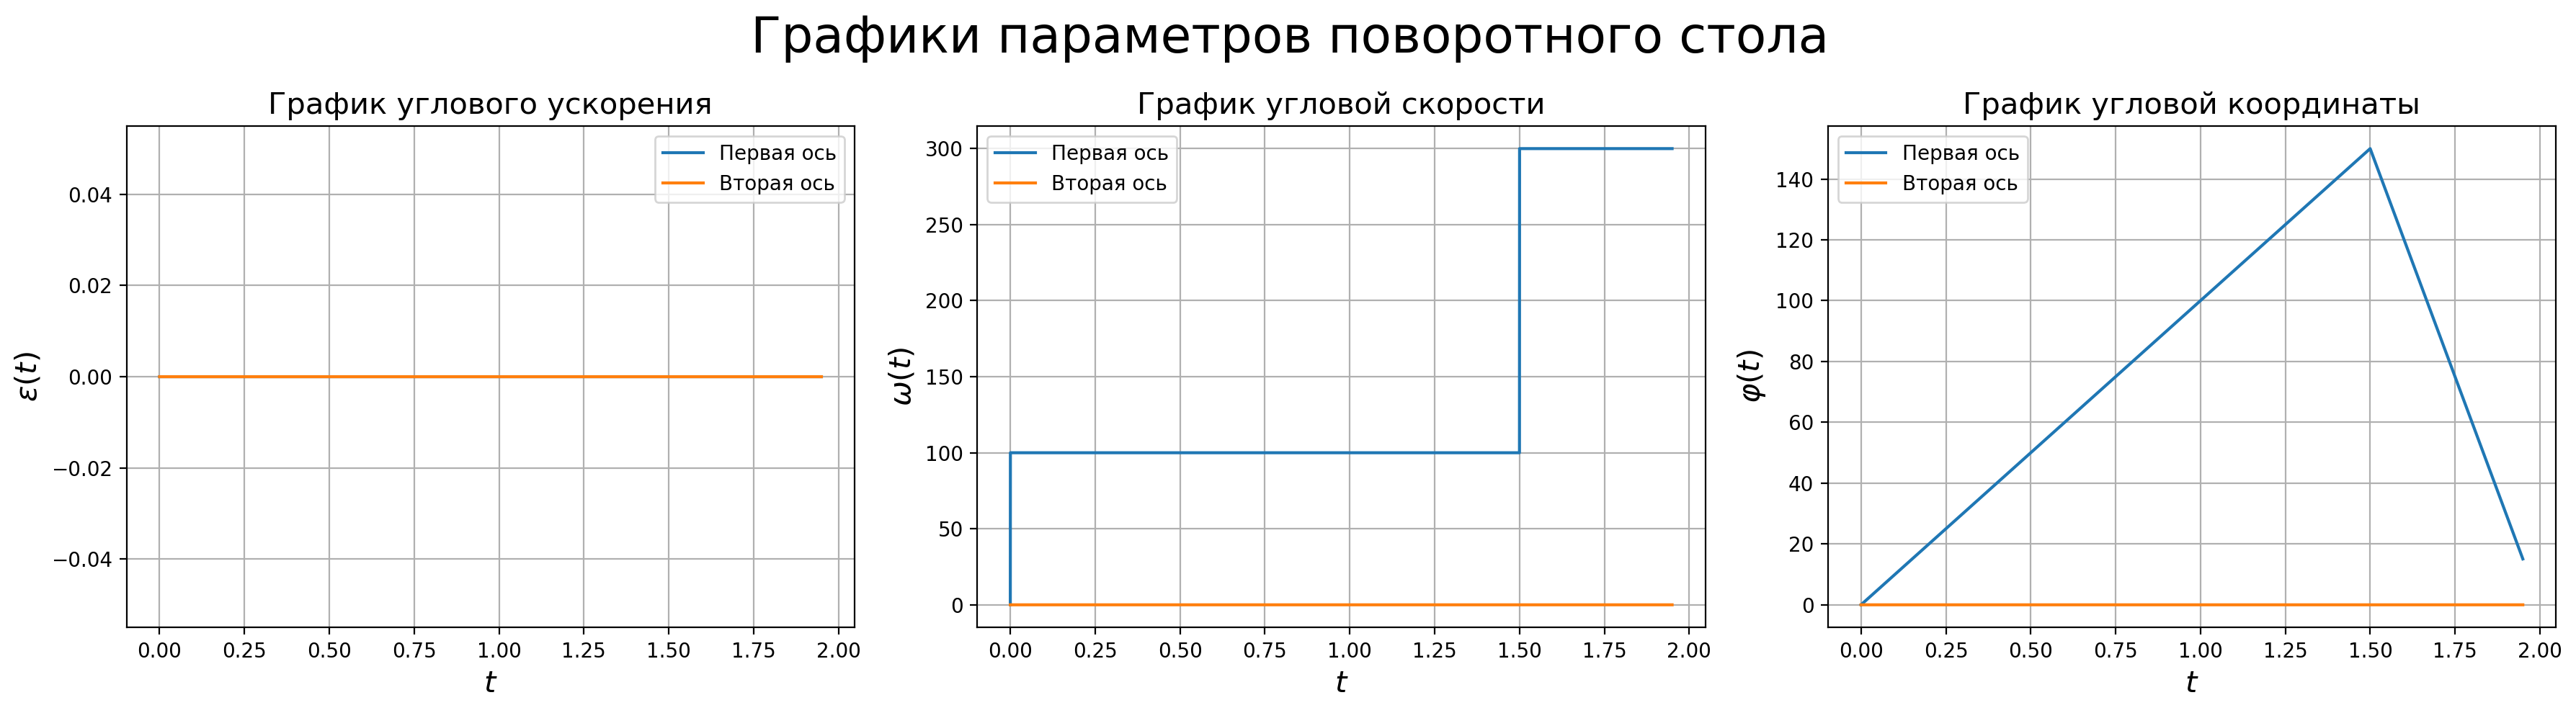

In [118]:
# plt.xkcd();
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), dpi=200)

axes[0].plot(my_table.time_history,
             my_table.accel_history[0], label="Первая ось")
axes[0].plot(my_table.time_history,
             my_table.accel_history[1], label="Вторая ось")
axes[0].set_title("График углового ускорения", fontsize=15)
axes[0].set_xlabel("$t$", fontsize=15)
axes[0].set_ylabel(r"$\varepsilon(t)$", fontsize=15)

axes[1].plot(my_table.time_history,
             my_table.rate_history[0], label="Первая ось")
axes[1].plot(my_table.time_history,
             my_table.rate_history[1], label="Вторая ось")
axes[1].set_title("График угловой скорости", fontsize=15)
axes[1].set_xlabel("$t$", fontsize=15)
axes[1].set_ylabel(r"$\omega(t)$", fontsize=15)

axes[2].plot(my_table.time_history,
             my_table.pos_history[0], label="Первая ось")
axes[2].plot(my_table.time_history,
             my_table.pos_history[1], label="Вторая ось")
axes[2].set_title("График угловой координаты", fontsize=15)
axes[2].set_xlabel("$t$", fontsize=15)
axes[2].set_ylabel(r"$\varphi(t)$", fontsize=15)

for ax in axes:
    ax.grid()
    ax.legend(prop={'size': 10})

fig.suptitle("Графики параметров поворотного стола", fontsize=25)
fig.tight_layout()

In [5]:
my_table.POS(2, 200, 250)
my_table.POS(2, 50, 250)
my_table.PRS(2, 150, 200)
my_table.PRS(2, 40, 1000)
my_table.PRV(2, 150, 500, 1)
my_table.RAT(2, 15, 10, 15)
my_table.SIN(2, 15, 3, 0.5, 180)